In [5]:
# -*- coding: utf-8 -*-
from bs4 import BeautifulSoup
import time
import random
import re
from tqdm import tqdm
# from selenium import webdriver
# from selenium import webdriver
# from selenium.webdriver.support.ui import Select
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver import ActionChains
import pandas as pd
import numpy as np
import time
import requests
import sys
import json
import pickle
from itertools import combinations

from konlpy.tag import Komoran

# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# vectorize & lda에 필요한 library
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# gensim의 ldamodel에 최적화된 라이브러리
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  

In [6]:
with open('./final_model/all_contents_refined_dup.pickle', 'rb') as f:
    all_contents_refined = pickle.load(f)

In [7]:
with open('./final_model/corpus.pickle', 'rb') as f:
    corpus = pickle.load(f)

In [8]:
with open('./final_model/dictionary.pickle', 'rb') as f:
    dictionary = pickle.load(f)

In [9]:
# Load model.
model_saved = LdaModel.load('./final_model/final_model_pass80.atmodel')

In [24]:
with open('./merged.pickle', 'rb') as f:
    merged = pickle.load(f)

In [27]:
contents_index=all_contents_refined['idx']

In [28]:
all_comments_refined = [x for x,idx in zip(merged['comments'],range(len(merged['comments']))) if idx in contents_index]
all_titles_refined = [x for x,idx in zip(merged['titles'],range(len(merged['titles']))) if idx in contents_index]
all_urls_refined = [x for x,idx in zip(merged['urls'],range(len(merged['urls']))) if idx in contents_index]

In [49]:
topic6_dict=dict()
for i in range(6):
    topic6_dict[i]={'titles':[],
            'contents':[],
            'comments':[],
            'similarity':[],
            'idx':[]}

In [52]:
all_contents_refined.keys()

dict_keys(['idx', 'contents'])

In [39]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)


        for j, (topic_num, prop_topic) in enumerate(doc): 
            if j == 0:  
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [40]:
topictable = make_topictable_per_doc(model_saved, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['No_document', 'No_topic', 'similarity', 'detail']

No_document  No_topic  similarity  \
0            0       4.0      0.5566   
1            1       4.0      0.5891   
2            2       1.0      0.5074   
3            3       2.0      0.9972   
4            4       4.0      0.4541   
5            5       5.0      0.7435   
6            6       2.0      0.3768   
7            7       0.0      0.5011   
8            8       4.0      0.3858   
9            9       2.0      0.9982   

                                              detail  
0  [(0, 0.14843452), (3, 0.06043524), (4, 0.55660...  
1  [(1, 0.37803248), (2, 0.030868785), (4, 0.5890...  
2                 [(1, 0.50742465), (5, 0.49117637)]  
3                                   [(2, 0.9971735)]  
4  [(0, 0.042765923), (3, 0.18534893), (4, 0.4540...  
5                    [(1, 0.253726), (5, 0.7434509)]  
6  [(0, 0.14606556), (1, 0.20621157), (2, 0.37678...  
7                  [(0, 0.5011229), (2, 0.49558938)]  
8  [(3, 0.32449052), (4, 0.38581866), (5, 0.28283...  
9                                  [(2, 0.99824405)]

In [53]:
for idx, row in topictable.iterrows():
    topic6_dict[int(row['No_topic'])]['titles'].append(all_titles_refined[idx])
    topic6_dict[int(row['No_topic'])]['contents'].append(all_contents_refined['contents'][idx])
    topic6_dict[int(row['No_topic'])]['comments'].append(all_comments_refined[idx])
    topic6_dict[int(row['No_topic'])]['similarity'].append(row['similarity'])
    topic6_dict[int(row['No_topic'])]['idx'].append(idx)


In [63]:
len(topic6_dict[5]['titles'])

450

In [49]:
results.sort_values(by='coherence', ascending=False)

chunksize  passes  condition_ntopic  coherence  perplexity
21       1000      40                 3  -3.112890   -7.074327
28       2000      20                 3  -3.196792   -7.116563
14       1000      20                 3  -3.205181   -7.081855
35       2000      40                 3  -3.283269   -7.101178
0         100      20                 3  -3.361541   -7.123732
7         100      40                 3  -3.391087   -7.103461
36       2000      40                 4  -4.724373   -7.055685
29       2000      20                 4  -4.728690   -7.068408
8         100      40                 4  -5.102500   -7.061973
15       1000      20                 4  -5.184291   -7.057053
1         100      20                 4  -5.258003   -7.085472
22       1000      40                 4  -5.419309   -7.052276
9         100      40                 5  -5.679869   -7.092571
2         100      20                 5  -5.723674   -7.112140
30       2000      20                 5  -5.885755   -7.057409
37       2000      40                 5  -5.971003   -7.041312
16       1000      20                 5  -6.009413   -7.040576
23       1000      40                 5  -6.875380   -7.029014
24       1000      40                 6  -7.524464   -7.005086
31       2000      20                 6  -7.877658   -7.013727
38       2000      40                 6  -8.026873   -6.999755
17       1000      20                 6  -8.167709   -7.011834
10        100      40                 6  -8.230058   -7.088671
3         100      20                 6  -8.269989   -7.105160
39       2000      40                 7  -9.361864   -6.984649
32       2000      20                 7  -9.628971   -7.001311
18       1000      20                 7  -9.866109   -7.018154
25       1000      40                 7  -9.878382   -7.008489
26       1000      40                 8 -10.405580   -7.005599
19       1000      20                 8 -10.631185   -7.016306
34       2000      20                 9 -13.083766   -6.989699
11        100      40                 7 -13.143251   -7.096136
40       2000      40                 8 -13.319268   -6.988582
4         100      20                 7 -13.815225   -7.112781
27       1000      40                 9 -14.077242   -6.979368
41       2000      40                 9 -14.183926   -6.978525
20       1000      20                 9 -14.229079   -6.986759
33       2000      20                 8 -14.947407   -7.003344
12        100      40                 8 -16.857010   -7.097445
5         100      20                 8 -17.085631   -7.116175
13        100      40                 9 -28.890190   -7.104153
6         100      20                 9 -28.989835   -7.133049

In [50]:
results.sort_values(by='perplexity')

chunksize  passes  condition_ntopic  coherence  perplexity
6         100      20                 9 -28.989835   -7.133049
0         100      20                 3  -3.361541   -7.123732
28       2000      20                 3  -3.196792   -7.116563
5         100      20                 8 -17.085631   -7.116175
4         100      20                 7 -13.815225   -7.112781
2         100      20                 5  -5.723674   -7.112140
3         100      20                 6  -8.269989   -7.105160
13        100      40                 9 -28.890190   -7.104153
7         100      40                 3  -3.391087   -7.103461
35       2000      40                 3  -3.283269   -7.101178
12        100      40                 8 -16.857010   -7.097445
11        100      40                 7 -13.143251   -7.096136
9         100      40                 5  -5.679869   -7.092571
10        100      40                 6  -8.230058   -7.088671
1         100      20                 4  -5.258003   -7.085472
14       1000      20                 3  -3.205181   -7.081855
21       1000      40                 3  -3.112890   -7.074327
29       2000      20                 4  -4.728690   -7.068408
8         100      40                 4  -5.102500   -7.061973
30       2000      20                 5  -5.885755   -7.057409
15       1000      20                 4  -5.184291   -7.057053
36       2000      40                 4  -4.724373   -7.055685
22       1000      40                 4  -5.419309   -7.052276
37       2000      40                 5  -5.971003   -7.041312
16       1000      20                 5  -6.009413   -7.040576
23       1000      40                 5  -6.875380   -7.029014
18       1000      20                 7  -9.866109   -7.018154
19       1000      20                 8 -10.631185   -7.016306
31       2000      20                 6  -7.877658   -7.013727
17       1000      20                 6  -8.167709   -7.011834
25       1000      40                 7  -9.878382   -7.008489
26       1000      40                 8 -10.405580   -7.005599
24       1000      40                 6  -7.524464   -7.005086
33       2000      20                 8 -14.947407   -7.003344
32       2000      20                 7  -9.628971   -7.001311
38       2000      40                 6  -8.026873   -6.999755
34       2000      20                 9 -13.083766   -6.989699
40       2000      40                 8 -13.319268   -6.988582
20       1000      20                 9 -14.229079   -6.986759
39       2000      40                 7  -9.361864   -6.984649
27       1000      40                 9 -14.077242   -6.979368
41       2000      40                 9 -14.183926   -6.978525

In [215]:
model_list

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[<gensim.models.ldamodel.LdaModel at 0x1fe0593f490>,
  -3.137247600871402,
  [3, 40]],
  -7.522373985991118,
  [5, 40]],
  -12.448255189799706,
  [7, 40]],
  -19.35315126784848,
  [9, 40]],
  -3.043897957186793,
  [3, 40]],
  -9.728492696009102,
  [5, 40]],
  -12.901765072629058,
  [7, 40]],
  -18.989422501208526,
  [9, 40]],
  -5.660527983649974,
  [3, 40]],
  -11.030589556866598,
  [5, 40]],
  -13.334174462876614,
  [7, 40]],
  -24.794319633879258,
  [9, 40]]]

## best model 시각화

In [145]:
model, tc = max([tuple(mod[:2]) for mod in model_list], key=lambda x: x[1])
print('Topic coherence: %.3e' %tc)

Topic coherence: -3.113e+00


In [524]:
model, tc, hyper = model_list[3]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
model_list[3]

 -8.269988823746456,
 [100, 20, 500, 6]]

In [359]:
print('\nPerplexity: ', model.log_perplexity(corpus))

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.127066349205045


In [206]:
# Save model.
model.save(path + '/model.atmodel')

In [43]:
path = 'C:/Users/commend/Documents/GitHub/05_NLP_pm/0111_topic_6'

In [139]:
# Save model.
bb[0].save('./final_model/final_model_pass80.atmodel')

In [33]:
# Load model.
model_saved = LdaModel.load(path + '/model.atmodel')

In [33]:
# Load model.
best_model = nn[0].load(path + '/model.atmodel')

In [515]:
model.show_topic(3)

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('서비스', 0.019178273),
 ('보험', 0.013687521),
 ('사고', 0.0130025055),
 ('공유', 0.012073616),
 ('모빌리티', 0.011877977),
 ('업체', 0.007852072),
 ('자동차', 0.007803451),
 ('이동', 0.007770459),
 ('전동킥보드', 0.006959064),
 ('자전거', 0.0067445)]

In [526]:
model.print_topics(num_words=20) 

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.025*"공유" + 0.017*"서비스" + 0.015*"모빌리티" + 0.015*"전동킥보드" + 0.015*"업체" + 0.014*"운영" + 0.012*"안전" + 0.011*"사업" + 0.010*"이용" + 0.009*"이동" + 0.009*"이용자" + 0.008*"자전거" + 0.007*"기술" + 0.007*"대표" + 0.007*"주행" + 0.007*"지역" + 0.006*"제공" + 0.006*"업계" + 0.006*"수단" + 0.006*"시장"'),
 (1,
  '0.035*"견인" + 0.030*"전동킥보드" + 0.023*"주차" + 0.021*"서울시" + 0.018*"업체" + 0.016*"불법" + 0.016*"구역" + 0.013*"신고" + 0.013*"방치" + 0.012*"주정차" + 0.011*"공유" + 0.010*"시행" + 0.009*"취소" + 0.009*"불편" + 0.009*"조례" + 0.008*"조치" + 0.008*"시민" + 0.008*"민원" + 0.008*"배달" + 0.008*"교통"'),
 (2,
  '0.016*"전동킥보드" + 0.015*"무단" + 0.014*"사고" + 0.012*"경찰" + 0.012*"무단_금지" + 0.011*"발생" + 0.010*"채널" + 0.010*"대여_업체" + 0.009*"조사" + 0.009*"현장" + 0.009*"안전" + 0.009*"대여" + 0.008*"저작권" + 0.008*"확인" + 0.008*"충전" + 0.008*"화재" + 0.008*"안전사고" + 0.007*"피해" + 0.007*"업체" + 0.007*"서울"'),
 (3,
  '0.027*"개인형" + 0.027*"개인형_이동" + 0.026*"이동" + 0.025*"장치" + 0.021*"사고" + 0.015*"운전" + 0.014*"면허" + 0.013*"도로교통법" + 0.012*"단속" + 0.012*"경찰" + 0.012*"만원" + 0.012*"범칙

In [146]:
vis = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)

ValidationError: 
 * Not all rows (distributions) in topic_term_dists sum to 1.

In [26]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)


        for j, (topic_num, prop_topic) in enumerate(doc): 
            if j == 0:  
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [47]:
mw9 = model_best

In [53]:
mw9 = model_best
topictable = make_topictable_per_doc(mw9, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['No_document', 'No_topic', 'similarity', 'detail']
high_simil = topictable.sort_values(by='similarity',ascending=False)
top2_high = [float(x) for x in range(0,9)]
top2_high*=5
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

# print(save_top2)
sorted_save_top2= sorted(save_top2)

for i in sorted_save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

0.0
0.9995999932289124
대다수 킥보드 이용자 바뀐 도로교통법 규정 몰라 자전거 도로 주행 허용 규정 도로 여건과 엇박자 개인형 이동장치 특성 고려한 맞춤형 법안 필요 전동킥보드 등 개인형 이동장치 규제를 완화한 다음 날 일 오후 광주 동구 서석동 한 대학가에서 전동킥보드 이용자들이 승차 정원을 초과한 채 차도를 주행하고 있다 자전거 도로는 찾기 힘들고 차로 갓길 주행은 위험한데 어떻게 이용하죠 전동 킥보드를 자전거 도로에서도 주행할 수 있도록 하는 내용의 도로교통법 개정안 등이 시행됐지만 대다수 킥보드 이용자들은 바뀐 규정을 몰라 혼선을 빚었다 일각선 도로 주행 여건과 제도간 괴리가 있다는 지적도 나왔다 지난 일 오후 광주 동구 한 대학가 대학 캠퍼스 안팎 어디에서든 전동 킥보드 이용자를 어렵지 않게 찾아볼 수 있었다 이용자 대부분은 안전모 착용 인 이상 탑승금지 횡단보도 통행 금지 등 기본 수칙을 지키지 않고 있었다 안전모를 착용하지 않은 한 전동 킥보드 이용자는 내리막길 도로 중앙을 달리다 마주 오던 차량과 부딪칠 뻔 했다 인도와 자전거 도로를 넘나드는 전동 킥보드를 발견한 어느 보행자는 함께 걷던 지인의 소매를 잡아당기며 조심해 라고 외치기도 했다 나란히 전동 킥보드를 타고 도로 한복판을 가로지르는 남녀도 있었다 횡단보도에선 신호에 맞춰 걷던 보행자가 맞은 편 인도에서 달려오는 킥보드를 피하려 멈칫 하는 경우도 눈에 띄었다 차량이 빠르게 달리는 차도와 자전거 도로가 없는 인도 사이에서 멈춘 채 고개를 갸우뚱 하는 킥보드 이용자도 보였다 한 킥보드 이용자는 정해진 규정이 있는 줄 몰랐다 인도로 천천히 가면 되지 않느냐 고 반문했다 최근 개인용 킥보드를 구매한 김모군은 인터넷으로 전동 킥보드를 구매한 뒤 안전 교육을 받은 적은 없다 며 며칠 전 공원 인도에서 행인이 여기서 타면 안 된다 고 주의를 줘 주행 관련 법 규정이 따로 있다는 것을 알게 됐다 고 말했다 전동킥보드 등 개인형 이동장치 규제가 완화한 도로교통법이 시행된 가운데 지난 일 

In [42]:
topictable = make_topictable_per_doc(model, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['No_document', 'No_topic', 'similarity', 'detail']
topictable[:10]

No_document  No_topic  similarity  \
0            0       4.0      0.7167   
1            1       4.0      0.8802   
2            2       1.0      0.5163   
3            3       2.0      0.9983   
4            4       4.0      0.6836   
5            5       0.0      0.8158   
6            6       3.0      0.4323   
7            7       2.0      0.5992   
8            8       4.0      0.3877   
9            9       2.0      0.9989   

                                              detail  
0   [(0, 0.2011484), (3, 0.0818765), (4, 0.7166893)]  
1                  [(2, 0.11831307), (4, 0.8802318)]  
2                  [(0, 0.4830266), (1, 0.51630706)]  
3                                   [(2, 0.9982828)]  
4  [(0, 0.29880074), (3, 0.017149128), (4, 0.6836...  
5                  [(0, 0.8158163), (1, 0.18283786)]  
6  [(1, 0.12788352), (2, 0.3143187), (3, 0.432342...  
7  [(0, 0.31926757), (2, 0.5992269), (3, 0.080615...  
8  [(0, 0.3107711), (3, 0.29793313), (4, 0.387701...  
9                                  [(2, 0.99893343)]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


889

In [43]:
topictable['No_topic'].value_counts()

0.0    521
2.0    290
1.0    230
4.0    162
3.0    141
Name: No_topic, dtype: int64

In [44]:
high_simil = topictable.sort_values(by='similarity',ascending=True)

In [45]:
top2_high = [float(x) for x in range(0,6)]
top2_high*=10
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

print(save_top2)

for i in save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

[[1.0, 45, 0.29280000925064087], [2.0, 102, 0.3305000066757202], [3.0, 1035, 0.34209999442100525], [0.0, 1327, 0.3424000144004822], [0.0, 834, 0.34790000319480896], [2.0, 240, 0.34869998693466187], [1.0, 478, 0.3490999937057495], [3.0, 442, 0.35179999470710754], [3.0, 368, 0.3555000126361847], [4.0, 608, 0.3580999970436096], [0.0, 667, 0.3603000044822693], [2.0, 1001, 0.36059999465942383], [4.0, 899, 0.36410000920295715], [0.0, 1063, 0.36640000343322754], [0.0, 1018, 0.37779998779296875], [2.0, 471, 0.3813000023365021], [1.0, 311, 0.38339999318122864], [0.0, 1128, 0.3837999999523163], [4.0, 8, 0.38769999146461487], [0.0, 873, 0.38769999146461487], [0.0, 1237, 0.390500009059906], [3.0, 505, 0.39480000734329224], [1.0, 871, 0.39809998869895935], [0.0, 1230, 0.4002000093460083], [0.0, 877, 0.4004000127315521], [1.0, 596, 0.40799999237060547], [3.0, 998, 0.40849998593330383], [1.0, 1180, 0.4205000102519989], [3.0, 268, 0.423799991607666], [3.0, 999, 0.4239000082015991], [1.0, 1130, 0.42590

NameError: name 'all_contents_refined' is not defined

In [49]:
top2_high = [float(x) for x in range(0,6)]
top2_high*=10
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

print(save_top2)

for i in save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

[[0.0, 363, 0.9995999932289124], [0.0, 778, 0.9995999932289124], [0.0, 350, 0.9995999932289124], [0.0, 1150, 0.9995999932289124], [0.0, 675, 0.9994999766349792], [0.0, 1154, 0.9994999766349792], [0.0, 400, 0.9994999766349792], [0.0, 445, 0.9994999766349792], [0.0, 394, 0.9994999766349792], [0.0, 909, 0.9994999766349792], [1.0, 196, 0.9994000196456909], [4.0, 1242, 0.9994000196456909], [3.0, 1337, 0.9994000196456909], [1.0, 126, 0.9993000030517578], [2.0, 491, 0.9993000030517578], [3.0, 974, 0.9991999864578247], [3.0, 450, 0.9991999864578247], [1.0, 602, 0.9991999864578247], [4.0, 1086, 0.9991000294685364], [3.0, 1107, 0.9991000294685364], [3.0, 216, 0.9991000294685364], [4.0, 105, 0.9991000294685364], [3.0, 274, 0.9991000294685364], [2.0, 382, 0.9991000294685364], [3.0, 452, 0.9991000294685364], [4.0, 203, 0.9990000128746033], [4.0, 1199, 0.9990000128746033], [4.0, 1015, 0.9990000128746033], [3.0, 1134, 0.9990000128746033], [4.0, 1231, 0.9990000128746033], [1.0, 218, 0.9990000128746033

NameError: name 'all_contents_refined' is not defined

In [46]:
top2_high = [float(x) for x in range(0,6)]
top2_high*=10
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

print(save_top2)

for i in save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

[[1.0, 45, 0.29280000925064087], [2.0, 102, 0.3305000066757202], [3.0, 1035, 0.34209999442100525], [0.0, 1327, 0.3424000144004822], [0.0, 834, 0.34790000319480896], [2.0, 240, 0.34869998693466187], [1.0, 478, 0.3490999937057495], [3.0, 442, 0.35179999470710754], [3.0, 368, 0.3555000126361847], [4.0, 608, 0.3580999970436096], [0.0, 667, 0.3603000044822693], [2.0, 1001, 0.36059999465942383], [4.0, 899, 0.36410000920295715], [0.0, 1063, 0.36640000343322754], [0.0, 1018, 0.37779998779296875], [2.0, 471, 0.3813000023365021], [1.0, 311, 0.38339999318122864], [0.0, 1128, 0.3837999999523163], [4.0, 8, 0.38769999146461487], [0.0, 873, 0.38769999146461487], [0.0, 1237, 0.390500009059906], [3.0, 505, 0.39480000734329224], [1.0, 871, 0.39809998869895935], [0.0, 1230, 0.4002000093460083], [0.0, 877, 0.4004000127315521], [1.0, 596, 0.40799999237060547], [3.0, 998, 0.40849998593330383], [1.0, 1180, 0.4205000102519989], [3.0, 268, 0.423799991607666], [3.0, 999, 0.4239000082015991], [1.0, 1130, 0.42590

NameError: name 'all_contents_refined' is not defined

In [81]:
model.id2word()

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'Dictionary' object is not callable

In [116]:
from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration

tokenizer = PreTrainedTokenizerFast.from_pretrained("ainize/kobart-news")
model = BartForConditionalGeneration.from_pretrained("ainize/kobart-news")

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
token_list=[]
for cont in join_content:
    token_list.append(tokenizer.encode(cont, return_tensors="pt"))

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
token_all_sentence=[]
for idx in range(len(all_contents_refined)):
    token_all_sentence.append(tokenizer.encode(all_contents_refined[idx], return_tensors="pt"))

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
token_list

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[tensor([[    0, 18252, 14149,  9507, 14331, 25091, 18024, 10577, 14585, 14097,
          11028, 14274,  9160, 14756, 28686, 20887, 14069, 11033, 20658, 14038,
           9879,  1700, 13110, 25820,  1700, 11693, 11693, 27487, 14756, 14351,
          20887, 14533, 15454, 21123, 16465, 18796, 14756, 14585, 15211, 14356,
          10232, 14533, 15692,  9866, 15526, 25304, 14038,  9879,  1700, 13110,
          25820, 14379, 19920, 15206, 15627, 15220, 15752, 14034, 13015, 27487,
          14498, 14454, 20887, 27270, 21708, 14832, 20579, 20887, 14069, 11033,
          20658, 19469, 16465, 18796, 14756, 15526, 27430, 20200,  1700, 13110,
          25820, 20887,  1700, 11693, 11693, 19469, 16465, 18796, 14756, 27270,
          17506, 23865, 14756, 14069, 11033, 20658, 20052, 20138, 14413, 14248,
          10519, 20063, 26506, 27010, 14331, 14797, 20887,  1700, 11693, 11693,
          15959,  1700, 11693, 11693, 14245, 17250, 20340, 19106, 14802, 16176,
          15122, 14883, 23283, 18005, 12

In [120]:
list(token_all_sentence[0].size())[1]


C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1091

In [121]:
token_all_sentence[0]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tensor([[    0, 12123, 10321,  ...,  9754,  1700,     1]])

In [129]:
test=token_all_sentence[0][:,:1026]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
list(token_all_sentence[0][:,:1024].size())

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1, 1024]

In [113]:
token_all_sentence[0]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tensor([[    0, 12123, 10321,  ..., 19220, 10490, 16657]])

In [132]:
for sentence,idx in zip(token_all_sentence,range(len(token_all_sentence))):
    if list(sentence.size())[1]>1026:  #list(token_all_sentence[0].size())[1]
        token_all_sentence[idx]=sentence[:,:1026]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
test= token_all_sentence[0:50]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
test

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[tensor([[    0, 12123, 10321,  ..., 19220, 10490, 16657]]),
 tensor([[    0, 16176,  9776, 20550, 13587, 10948, 20731, 14060, 14183, 27389,
          28343, 26882, 11776, 14051, 12335, 15392, 17903, 22785, 16135, 16982,
          15707, 10518, 14280, 16176, 16765, 20550, 13587, 15225, 15628, 14051,
          12335, 22903, 22785, 16135, 14049, 14048, 19953, 18001, 14118, 15538,
          15313, 14055, 16176, 15132, 14655, 20550, 13587, 10948, 14789, 11465,
          11843, 14025,  9925, 13831, 17974, 15550, 14908, 14025, 19812, 15107,
          15509, 26594, 14934, 15131, 14788, 14441, 14739, 28343, 16935, 17360,
          11294, 15021, 18494, 17834, 14088, 12922, 13234, 17903, 22785, 15774,
           9754, 14025, 28784, 28343, 16935, 17360, 11294, 12007, 19756, 15527,
          14025, 10431, 12612, 23199, 19067, 14280, 28081, 12060, 15062, 11786,
          15501, 19085, 12124, 25165, 17834, 16508, 19430, 14189, 10325,  9754,
          16176,  9776, 26423, 14038,  9879,  1700, 13110, 

In [143]:
summary_text_ids=[]
for cont in tqdm(test):
    summary_text_ids.append(model.generate(
        input_ids=cont,
        bos_token_id=model.config.bos_token_id,
        eos_token_id=model.config.eos_token_id,
        length_penalty=2.0,
        max_length=128,
        min_length=32,
        num_beams=4
        )
    )

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:22<00:00,  2.85s/it]


In [147]:
summary_text_ids[0][0]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tensor([    2,     0, 25560, 20887, 10607, 11033, 20658,  9698, 14533, 15692,
        14973, 14904, 14038,  9879,  1700, 13110, 25820, 14379, 14590, 19911,
        15206, 14191, 14185, 14038,  9879,  1700, 13110, 25820,  1700, 11693,
        11693, 27487, 16657, 14141, 14055, 14150, 15358, 15844, 15220, 14147,
        14034, 13015, 13173,  9866, 14025, 27487, 13594, 26348, 14253, 14130,
            1])

In [150]:
tl=[]
for i in range(50):
    print(tokenizer.decode(summary_text_ids[i][0],skip_special_tokens=True),end="\n\n")
    tl.append(tokenizer.decode(summary_text_ids[i][0],skip_special_tokens=True))

지난 카카오모빌리티는 이용 빈도가 높은 전동 킥보드 사업에서도 경쟁력을 확보하기 위해 전동 킥보드 씽씽 연동 서비스를 지난 일부터 시행했고 내년에는 지쿠터도 이 연동할 계획이라고 밝혔다.

울산대 융합학부팀이 제 회 빅데이터 인공지능 스타트업 경진대회 에서 대상을 수상하고 급 증가하는 전동 킥보드 사고 예방을 위해 실시간으로 사용자의 헬멧 착용 여부를 감지하는 기능 주행 중인 노면의 경사도를 감지한 뒤 킥보드의 제한속도를 결정하는 기능을 개발하는 등 울산대 팀은 빅데이터 인공지능 관련 스타트업 및 예비 창업가를 지원하기 위해 준비된 경진대회 에서 각종 경진대회에서 대상을 수상하는 등 우수한 성과를 거두고 있다

공정거래위원회는 소비자에게 무면허로 운전하다 적발될 경우 만원의 범칙금이 부과된다는 내용을 알려야 하는 내용을 알려야 하는 전동 킥보드 판매 대여 업체는 무면허 운전을 포함해 음주 운전 동승자 탑승 안전모 미착용 보도 주행 세 미만 어린이의 운전 등의 내용을 알려야 한다는 내용을 포함한 중요한 표시 광고 사항 고시 를 일 개정해 시행한다고 밝혔다.

지난유튜브 채널 한문철 에는 지난 일 아이들 두 명이 탄 전동킥보드가 갑자기 나타나 사고가 났는데 촉법소년이라 처벌할 수도 없고 사고가 났는데 촉법소년이라 처벌할 수도 없고 부모가 합의금과 치료비를 대야 하는 상황이라는 제목의 영상이 올라왔는데 사고는 지난 일 오후 시경 수원의 한 골목에서 발생했다

전동킥보드를 비롯한 개인형 이동수단을 둘러싼 잡음이 계속되고 있다며, 해당 사업을 영위하는 업계 내에서도 을 바라보는 시각이 엇갈리고 업계 내에서도 서로 다른 의견에는 관련 시장의 급성장에 따른 부작용을 지목할 수 있다며, 전동킥보드 등 개인형 이동수단은 빠르게 성장해 제도권 이동수단으로 자리했다 제도권으로 들어온 만큼 이용자들의 안전과 공공의 이익을 고려하지 않는 업체는 빠르게 퇴출되도록 더욱 엄격한 제도가 마련돼야 한다며 킥보드 대수를 조절할 수 있고 사후관리에도 신경 쓰게 되야 사후관리를 제대로 하지 않거

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [170]:
a=' '.join(tl)

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
a

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'지난 카카오모빌리티는 이용 빈도가 높은 전동 킥보드 사업에서도 경쟁력을 확보하기 위해 전동 킥보드 씽씽 연동 서비스를 지난 일부터 시행했고 내년에는 지쿠터도 이 연동할 계획이라고 밝혔다. 울산대 융합학부팀이 제 회 빅데이터 인공지능 스타트업 경진대회 에서 대상을 수상하고 급 증가하는 전동 킥보드 사고 예방을 위해 실시간으로 사용자의 헬멧 착용 여부를 감지하는 기능 주행 중인 노면의 경사도를 감지한 뒤 킥보드의 제한속도를 결정하는 기능을 개발하는 등 울산대 팀은 빅데이터 인공지능 관련 스타트업 및 예비 창업가를 지원하기 위해 준비된 경진대회 에서 각종 경진대회에서 대상을 수상하는 등 우수한 성과를 거두고 있다 공정거래위원회는 소비자에게 무면허로 운전하다 적발될 경우 만원의 범칙금이 부과된다는 내용을 알려야 하는 내용을 알려야 하는 전동 킥보드 판매 대여 업체는 무면허 운전을 포함해 음주 운전 동승자 탑승 안전모 미착용 보도 주행 세 미만 어린이의 운전 등의 내용을 알려야 한다는 내용을 포함한 중요한 표시 광고 사항 고시 를 일 개정해 시행한다고 밝혔다. 지난유튜브 채널 한문철 에는 지난 일 아이들 두 명이 탄 전동킥보드가 갑자기 나타나 사고가 났는데 촉법소년이라 처벌할 수도 없고 사고가 났는데 촉법소년이라 처벌할 수도 없고 부모가 합의금과 치료비를 대야 하는 상황이라는 제목의 영상이 올라왔는데 사고는 지난 일 오후 시경 수원의 한 골목에서 발생했다 전동킥보드를 비롯한 개인형 이동수단을 둘러싼 잡음이 계속되고 있다며, 해당 사업을 영위하는 업계 내에서도 을 바라보는 시각이 엇갈리고 업계 내에서도 서로 다른 의견에는 관련 시장의 급성장에 따른 부작용을 지목할 수 있다며, 전동킥보드 등 개인형 이동수단은 빠르게 성장해 제도권 이동수단으로 자리했다 제도권으로 들어온 만큼 이용자들의 안전과 공공의 이익을 고려하지 않는 업체는 빠르게 퇴출되도록 더욱 엄격한 제도가 마련돼야 한다며 킥보드 대수를 조절할 수 있고 사후관리에도 신경 쓰게 되야 사후관리를 제대로 하지 않거나 위

In [172]:
total_summary=(model.generate(
    input_ids=a,
    bos_token_id=model.config.bos_token_id,
    eos_token_id=model.config.eos_token_id,
    length_penalty=2.0,
    max_length=128,
    min_length=32,
    num_beams=4
    )
)

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'str' object has no attribute 'shape'

In [45]:
join_content[0]

C:\Users\dogu\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'가격 반납 지역 광범위 헬멧 운영 미비 판교 서비스 부재 카카오 모빌리티 전동 킥보드 씽씽 연동 서비스 시작 카카오 이용 회사 그간 전기 자전거 서비스 운영 경험 근래 이용 빈도 이동 수단 전동 킥보드 사업 경쟁력 확보 방침 내년 이전 지쿠 연동 예정 국내 카카오 이용자 누적 기준 가량 카카오 모빌리티 택시 전기 자전거 서비스 이동 일상생활 편리 킥보드 카카오 씽씽 택시 전기 자전거 서비스 이용자 편의 제고 서비스 모빌리티 플랫폼 선도 기업 명맥 코리아 직장인 밀집 지역 중심 카카오 씽씽 체험 씽씽 서울 수원 용인 성남 부산 울산 광주 규모 탑승 거주지 근거리 경기 성남 판교 선택 정보기술 기업 최소 정도 생각 지하철 신분당선 판교역 출구 인근 카카오 모빌리티 서비스 씽씽 킥보드 마음 지하철 신분당선 판교역 카카오 킥보드 페이지 전기 자전거 이용 카테고리 바이크 이용자 라면 혼동 씽씽 대도 바이크 보니 전기 자전거 본사 판교 인근 분당선 정자역 근처 씽씽 분당선 모란역 가천대역 주변 씽씽 직장인 유동 인구 서울 강남 이동 지하철 호선 강남역 주변 씽씽 스윙 라임 다트 킥보드 걸음 씽씽 사용 절차 카카오 운전 면허증 인증 원동기 장치 자전거 면허 보유자 씽씽 사용 면허증 인증 사용 킥보드 코드 코드 킥보드 좌측 상단 킥보드 해제 이용 사용법 속도 킥보드 오른쪽 핸들 부착 가속 버튼 일시 정지 기능 이용 중단 좌측 핸들 안쪽 소리 경보 강남역 인근 지하철 호선 신논현역 차량 인적 도로 사용 방법 면허증 인증 대여 킥보드 코드 운행 시작 하면 된다 가량 배터리 요금 기본 요금 분당 추가 비용 발생 기본 요금 이용 합산 평일 주말 기본 요금 심야 이용 추가 요금 합리 가격 여타 전동 킥보드 가격 방식 킥보드 신논현역 강남역 이동 이용 가격 기본 요금 분당 부과 형태 킥보드 요금 지불 기준 킥보드 씽씽 천원 씽씽 반납 지역 범위 특장 반납 지역 한정 킥보드 씽씽 인근 대여 킥보드 안전 헬멧 구비 올해 도로교통법 개정 헬멧 착용 의무 착용 범칙금 만원 부과 이날 강남 

In [51]:
num_topics_l = [6]
chunksize_l = [2000]
passes_l = [40, 80]#[20, 30, 40]
iterations_l = [5000, 8000]
random_state_l = [2022, 1, 11, 2] 
#                   1209, 1005, 123, 0]
model_list2 = []
                                                        
for random_state in random_state_l:                    
    for chunksize in chunksize_l:
        for passes in tqdm(passes_l):
            for iterations in iterations_l:
                for num_topics in num_topics_l:
                    model = LdaModel(corpus = corpus, id2word = dictionary, chunksize = chunksize,
                                           alpha ="auto", eta="auto",
                                           iterations = iterations, num_topics = num_topics,
                                           passes = passes, random_state=random_state)
                    top_topics = model.top_topics(corpus)
                    tc = sum([t[1] for t in top_topics])
                    hyper = [chunksize, passes, iterations, num_topics]
                    model_list2.append((model, tc, hyper))
                    print('done')
                    

  0%|          | 0/2 [00:00<?, ?it/s]

done


 50%|█████     | 1/2 [02:23<02:23, 143.48s/it]

done
done


100%|██████████| 2/2 [06:29<00:00, 194.66s/it]


done


  0%|          | 0/2 [00:00<?, ?it/s]

done


 50%|█████     | 1/2 [02:26<02:26, 146.66s/it]

done
done


100%|██████████| 2/2 [06:36<00:00, 198.46s/it]


done


  0%|          | 0/2 [00:00<?, ?it/s]

done


 50%|█████     | 1/2 [02:36<02:36, 156.18s/it]

done
done


100%|██████████| 2/2 [07:02<00:00, 211.20s/it]


done


  0%|          | 0/2 [00:00<?, ?it/s]

done


 50%|█████     | 1/2 [02:22<02:22, 142.96s/it]

done
done


100%|██████████| 2/2 [06:40<00:00, 200.12s/it]

done


In [52]:
model_list2

[(<gensim.models.ldamodel.LdaModel at 0x25d990e7eb0>,
  -8.89306389502607,
  [2000, 40, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b21c370>,
  -8.89306389502607,
  [2000, 40, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b7cad90>,
  -8.94759940235463,
  [2000, 80, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd4f0>,
  -8.94759940235463,
  [2000, 80, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd370>,
  -7.696690226243967,
  [2000, 40, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd820>,
  -7.694919319735434,
  [2000, 40, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd4c0>,
  -7.676538025216942,
  [2000, 80, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fdc40>,
  -7.6780559649679265,
  [2000, 80, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fdcd0>,
  -6.895080291922179,
  [2000, 40, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd460>,
  -6.893826306716262,
  [2000, 40, 8000, 6]),
 (<

In [45]:
num_topics_l = [6]
chunksize_l = [2000]
passes_l = [40]#[20, 30, 40]
iterations_l = [1000]
random_state_l = [2022, 1, 11, 2, 1209, 1005, 123, 0]
model_list = []
                                                        
for random_state in random_state_l:                    
    for chunksize in tqdm(chunksize_l):
        for passes in passes_l:
            for iterations in iterations_l:
                for num_topics in num_topics_l:
                    model = LdaModel(corpus = corpus, id2word = dictionary, chunksize = chunksize,
                                           alpha ="auto", eta="auto",
                                           iterations = iterations, num_topics = num_topics,
                                           passes = passes, random_state=random_state)
                    top_topics = model.top_topics(corpus)
                    tc = sum([t[1] for t in top_topics])
                    hyper = [chunksize, passes, iterations, num_topics]
                    model_list.append((model, tc, hyper))
                    print('done')
                    

100%|██████████| 1/1 [01:11<00:00, 71.07s/it]


done


100%|██████████| 1/1 [01:15<00:00, 75.17s/it]


done


100%|██████████| 1/1 [01:18<00:00, 78.96s/it]


done


100%|██████████| 1/1 [01:11<00:00, 71.96s/it]


done


100%|██████████| 1/1 [01:10<00:00, 70.02s/it]


done


100%|██████████| 1/1 [01:10<00:00, 70.65s/it]


done


100%|██████████| 1/1 [01:13<00:00, 73.91s/it]


done


100%|██████████| 1/1 [01:13<00:00, 73.05s/it]

done


In [46]:
model_list

[(<gensim.models.ldamodel.LdaModel at 0x25d9b848e80>,
  -8.896954095068862,
  [2000, 40, 1000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b859f10>,
  -7.711848892718806,
  [2000, 40, 1000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b859280>,
  -6.844640168311276,
  [2000, 40, 1000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b859e20>,
  -8.039696993859884,
  [2000, 40, 1000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b859cd0>,
  -9.538379446936753,
  [2000, 40, 1000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b859a30>,
  -8.017144244832508,
  [2000, 40, 1000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b859700>,
  -7.232375631296234,
  [2000, 40, 1000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b845520>,
  -7.976449034867877,
  [2000, 40, 1000, 6])]

In [6]:
num_topics_l = [6]
chunksize_l = [1000, 2000]
passes_l = [20, 30, 40]#[20, 30, 40]
iterations_l = [100, 500, 1000]
random_state_l = [386, 13]

# passes_l = [10, 20, 30, 40]
# iterations_l = [100, 400, 500, 1000]
# random_state_l = [2021, 2022, 12, 30, 0]

# num_topics_l = [5]#list(range(3,11))
# chunksize_l = [2000]

# #random_state_l = [2021, 2022, 12, 30, 0]

model_list = []
                                                        
for random_state in random_state_l:                    
    for chunksize in tqdm(chunksize_l):
        for passes in passes_l:
            for iterations in iterations_l:
                for num_topics in num_topics_l:
                    model = LdaModel(corpus = corpus, id2word = dictionary, chunksize = chunksize,
                                           alpha ="auto", eta="auto",
                                           iterations = iterations, num_topics = num_topics,
                                           passes = passes, random_state=random_state)
                    top_topics = model.top_topics(corpus)
                    tc = sum([t[1] for t in top_topics])
                    hyper = [chunksize, passes, iterations, num_topics]
                    model_list.append((model, tc, hyper))
                    print('done')
                    

  0%|          | 0/2 [00:00<?, ?it/s]

done
done
done
done
done
done
done
done


 50%|█████     | 1/2 [03:52<03:52, 232.29s/it]

done
done
done
done
done
done
done
done
done


100%|██████████| 2/2 [12:27<00:00, 373.61s/it]


done


  0%|          | 0/2 [00:00<?, ?it/s]

done
done
done
done
done
done
done
done


 50%|█████     | 1/2 [03:43<03:43, 223.45s/it]

done
done
done
done
done
done
done
done
done


100%|██████████| 2/2 [11:47<00:00, 353.55s/it]

done


In [84]:
num_topics_l = [6]
chunksize_l = [2000]
passes_l = [40, 80]#[20, 30, 40]
iterations_l = [2000]
random_state_l = [386, 30, 2005, 1130, 45, 46, 47, 1994]


# passes_l = [10, 20, 30, 40]
# iterations_l = [100, 400, 500, 1000]
# random_state_l = [2021, 2022, 12, 30, 0]

# num_topics_l = [5]#list(range(3,11))
# chunksize_l = [2000]

# #random_state_l = [2021, 2022, 12, 30, 0]

model_list3 = []
                                                        
for random_state in random_state_l:                    
    for chunksize in tqdm(chunksize_l):
        for passes in passes_l:
            for iterations in iterations_l:
                for num_topics in num_topics_l:
                    model = LdaModel(corpus = corpus, id2word = dictionary, chunksize = chunksize,
                                           alpha ="auto", eta="auto",
                                           iterations = iterations, num_topics = num_topics,
                                           passes = passes, random_state=random_state)
                    top_topics = model.top_topics(corpus)
                    tc = sum([t[1] for t in top_topics])
                    hyper = [chunksize, passes, iterations, num_topics]
                    model_list3.append((model, tc, hyper))
                    print('done')
                    
with open('./0111_topic_6/model_list_topic6_iter_fin.pickle', 'wb') as f:
    pickle.dump(model_list3, f)

  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:16<00:00, 196.48s/it]


done


  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:29<00:00, 209.66s/it]


done


  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:29<00:00, 209.42s/it]


done


  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:14<00:00, 194.27s/it]


done


  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:06<00:00, 186.62s/it]


done


  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:16<00:00, 196.73s/it]


done


  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:21<00:00, 201.05s/it]


done


  0%|          | 0/1 [00:00<?, ?it/s]

done


100%|██████████| 1/1 [03:18<00:00, 198.62s/it]

done


In [94]:
for random_state in random_state_l:                    
    for chunksize in chunksize_l:
        for passes in passes_l:
            for iterations in iterations_l:
                for num_topics in num_topics_l:
                    print(random_state)

386
386
30
30
2005
2005
1130
1130
45
45
46
46
47
47
1994
1994


In [91]:
model_list

[(<gensim.models.ldamodel.LdaModel at 0x25d943af4f0>,
  -6.829901578291599,
  [2000, 40, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b777a30>,
  -6.864651164663475,
  [2000, 80, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b7772e0>,
  -7.436814280080812,
  [2000, 40, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b777070>,
  -7.337824424167429,
  [2000, 80, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b777df0>,
  -6.728597640494273,
  [2000, 40, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b777fd0>,
  -6.678540096324745,
  [2000, 80, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b7771c0>,
  -7.805956827000174,
  [2000, 40, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b777910>,
  -7.605183809640131,
  [2000, 80, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b777fa0>,
  -7.590676293274522,
  [2000, 40, 2000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b777880>,
  -7.47332246522187,
  [2000, 80, 2000, 6]),
 

In [95]:
[x[1] for x in model_list[:2]]

[-6.829901578291599, -6.864651164663475]

In [7]:
len(model_list)

36

In [50]:
with open('./0111_topic_6/model_list_topic6_iter1000.pickle', 'wb') as f:
    pickle.dump(model_list, f)

In [53]:
with open('./0111_topic_6/model_list_topic6_iter_random.pickle', 'wb') as f:
    pickle.dump(model_list2, f)

In [12]:
with open('./0110_topic_5/model_list_topic6.pickle', 'rb') as f:
    mm = pickle.load(f)

In [58]:
with open('./0111_topic_6/model_list_topic6_iter1000.pickle', 'rb') as f:
    model_ls = pickle.load(f)

In [13]:
model_list2 = model_list
model_list = mm

In [14]:
#[chunksize, passes, iterations, num_topics]
model_list[2][2]

[1000, 20, 1000, 6]

In [59]:
model_list = model_ls

In [85]:
model_list = model_list3

In [86]:
model_perplexity = [x[0].log_perplexity(corpus) for x in model_list]

In [73]:
[np.exp2(-x)for x in model_perplexity]

[125.93748704650353,
 125.93748704650353,
 125.6850855951254,
 125.6850855951254,
 124.61573646033858,
 124.61688600802988,
 124.10721162196522,
 124.10545750568043,
 126.5730511432328,
 126.57098140015813,
 126.13508360987409,
 126.13300086281603,
 126.85142154749683,
 126.85142154749683,
 126.43466092880801,
 126.43466092880801]

In [87]:
results = pd.DataFrame(data={'chunksize':[x[2][0] for x in model_list],
                             'passes':[x[2][1] for x in model_list],
                             'iter': [x[2][2] for x in model_list],
                             'condition_ntopic':[x[2][3] for x in model_list],
                             'coherence':[x[1] for x in model_list], 
                             'perplexity':[np.exp2(-x)for x in model_perplexity]})

In [62]:
results.sort_values(by=['perplexity'], ascending=True)

chunksize  passes  iter  condition_ntopic  coherence  perplexity
1       2000      40  1000                 6  -7.711849  124.686532
0       2000      40  1000                 6  -8.896954  125.929522
6       2000      40  1000                 6  -7.232376  126.017063
7       2000      40  1000                 6  -7.976449  126.155373
2       2000      40  1000                 6  -6.844640  126.545131
3       2000      40  1000                 6  -8.039697  126.802059
5       2000      40  1000                 6  -8.017144  127.039280
4       2000      40  1000                 6  -9.538379  127.161494

In [67]:
results.sort_values(by=['passes','iter'], ascending=True)

chunksize  passes  iter  condition_ntopic  coherence  perplexity
0        2000      40  5000                 6  -8.893064  125.937487
4        2000      40  5000                 6  -7.696690  124.615736
8        2000      40  5000                 6  -6.895080  126.573051
12       2000      40  5000                 6  -7.647121  126.851422
1        2000      40  8000                 6  -8.893064  125.937487
5        2000      40  8000                 6  -7.694919  124.616886
9        2000      40  8000                 6  -6.893826  126.570981
13       2000      40  8000                 6  -7.647121  126.851422
2        2000      80  5000                 6  -8.947599  125.685086
6        2000      80  5000                 6  -7.676538  124.107212
10       2000      80  5000                 6  -6.881442  126.135084
14       2000      80  5000                 6  -7.267897  126.434661
3        2000      80  8000                 6  -8.947599  125.685086
7        2000      80  8000                 6  -7.678056  124.105458
11       2000      80  8000                 6  -6.876495  126.133001
15       2000      80  8000                 6  -7.267897  126.434661

In [90]:
results.sort_values(by=['passes','perplexity'], ascending=True)

chunksize  passes  iter  condition_ntopic  coherence  perplexity
2        2000      40  2000                 6  -7.436814  126.146310
10       2000      40  2000                 6  -8.515883  126.512435
6        2000      40  2000                 6  -7.805957  127.156016
4        2000      40  2000                 6  -6.728598  127.661130
14       2000      40  2000                 6  -8.880062  127.918172
8        2000      40  2000                 6  -7.590676  127.968694
12       2000      40  2000                 6  -7.512901  128.269906
0        2000      40  2000                 6  -6.829902  128.507585
3        2000      80  2000                 6  -7.337824  125.478117
11       2000      80  2000                 6  -8.035243  125.575516
7        2000      80  2000                 6  -7.605184  126.615918
5        2000      80  2000                 6  -6.678540  126.823494
1        2000      80  2000                 6  -6.864651  127.101274
9        2000      80  2000                 6  -7.473322  127.389881
15       2000      80  2000                 6  -7.726763  127.514337
13       2000      80  2000                 6  -7.639135  127.851744

In [17]:
results.sort_values(by=['perplexity'], ascending=True)

chunksize  passes  iter  condition_ntopic  coherence  perplexity
15       2000      40   100                 6  -6.883863  126.661257
12       2000      30   100                 6  -6.846159  126.967886
33       2000      40   100                 6  -7.186664  126.971069
6        1000      40   100                 6  -6.692106  126.991860
30       2000      30   100                 6  -7.268174  127.288003
3        1000      30   100                 6  -6.819530  127.371995
9        2000      20   100                 6  -6.684524  127.595400
16       2000      40   500                 6  -6.778925  127.888413
0        1000      20   100                 6  -7.024896  127.953534
27       2000      20   100                 6  -7.306134  127.985086
34       2000      40   500                 6  -7.064985  128.049963
17       2000      40  1000                 6  -6.807321  128.208307
35       2000      40  1000                 6  -7.450450  128.396648
31       2000      30   500                 6  -7.317609  128.503312
13       2000      30   500                 6  -6.938599  128.653269
32       2000      30  1000                 6  -7.303885  128.752422
7        1000      40   500                 6  -6.811579  128.818018
14       2000      30  1000                 6  -6.934707  129.012636
8        1000      40  1000                 6  -6.850410  129.113439
4        1000      30   500                 6  -6.667604  129.240172
28       2000      20   500                 6  -6.937955  129.333456
29       2000      20  1000                 6  -7.528974  129.490913
5        1000      30  1000                 6  -6.778982  129.538264
25       1000      40   500                 6  -7.932929  129.583750
26       1000      40  1000                 6  -8.021374  129.645607
24       1000      40   100                 6  -7.837637  129.666615
22       1000      30   500                 6  -7.984102  129.814835
21       1000      30   100                 6  -7.517770  129.850267
23       1000      30  1000                 6  -8.126305  129.898996
10       2000      20   500                 6  -7.041325  129.980748
1        1000      20   500                 6  -6.827446  129.996995
18       1000      20   100                 6  -7.512044  130.211772
11       2000      20  1000                 6  -6.859580  130.239804
19       1000      20   500                 6  -8.141921  130.312031
20       1000      20  1000                 6  -8.030831  130.442909
2        1000      20  1000                 6  -6.865268  130.478934

In [88]:
results.sort_values(by=['coherence'], ascending=False)

chunksize  passes  iter  condition_ntopic  coherence  perplexity
5        2000      80  2000                 6  -6.678540  126.823494
4        2000      40  2000                 6  -6.728598  127.661130
0        2000      40  2000                 6  -6.829902  128.507585
1        2000      80  2000                 6  -6.864651  127.101274
3        2000      80  2000                 6  -7.337824  125.478117
2        2000      40  2000                 6  -7.436814  126.146310
9        2000      80  2000                 6  -7.473322  127.389881
12       2000      40  2000                 6  -7.512901  128.269906
8        2000      40  2000                 6  -7.590676  127.968694
7        2000      80  2000                 6  -7.605184  126.615918
13       2000      80  2000                 6  -7.639135  127.851744
15       2000      80  2000                 6  -7.726763  127.514337
6        2000      40  2000                 6  -7.805957  127.156016
11       2000      80  2000                 6  -8.035243  125.575516
10       2000      40  2000                 6  -8.515883  126.512435
14       2000      40  2000                 6  -8.880062  127.918172

In [ ]:
2000	40	5000	6

In [ ]:
[2000	40	1000

In [33]:
def model(num):
    return [x[0] for x in model_list if x[2] == num][0]

In [74]:
nn = list()
for x in model_list:
    if x[2] == [2000, 40, 1000, 6]:
        nn.append(x[0])

In [79]:
oo = list()
for x in model_list:
    if x[2] == [2000, 80, 5000, 6]:
        oo.append(x[0])

In [97]:
aa = list()
for x in model_list:
    if x[2] == [2000, 40, 2000, 6]:
        aa.append(x[0])

In [98]:
bb = list()
for x in model_list:
    if x[2] == [2000, 80, 2000, 6]:
        bb.append(x[0])

In [80]:
oo

In [75]:
model_list

[(<gensim.models.ldamodel.LdaModel at 0x25d990e7eb0>,
  -8.89306389502607,
  [2000, 40, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b21c370>,
  -8.89306389502607,
  [2000, 40, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b7cad90>,
  -8.94759940235463,
  [2000, 80, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd4f0>,
  -8.94759940235463,
  [2000, 80, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd370>,
  -7.696690226243967,
  [2000, 40, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd820>,
  -7.694919319735434,
  [2000, 40, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd4c0>,
  -7.676538025216942,
  [2000, 80, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fdc40>,
  -7.6780559649679265,
  [2000, 80, 8000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fdcd0>,
  -6.895080291922179,
  [2000, 40, 5000, 6]),
 (<gensim.models.ldamodel.LdaModel at 0x25d9b1fd460>,
  -6.893826306716262,
  [2000, 40, 8000, 6]),
 (<

In [55]:
model([2000, 40, 1000, 5])

TypeError: 'LdaModel' object is not callable

In [78]:
nn

In [37]:
model_best = model([2000, 40, 1000, 5])

In [39]:
pyLDAvis.save_html(vis, 'customer_jc.html')

In [76]:
vis = gensimvis.prepare(nn[0], corpus, dictionary)
pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'customer_jc_topic6_iter5000_pass40.html')

C:\Users\commend\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [81]:
vis = gensimvis.prepare(oo[0], corpus, dictionary)
pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'customer_jc_topic6_iter5000_pass80.html')

In [20]:
import matplotlib.pyplot as plt

In [199]:
def scree_plot(ntopic):
    cond = results['condition_ntopic'] == ntopic
    re_n3_n = results.loc[cond].sort_values(by='coherence', ascending=False).reset_index()
    print(re_n3_n)
#     plt.plot(re_n3_n.index, re_n3_n.coherence, '--bo')
#     plt.plot(re_n3_n.index, re_n3_n.perplexity, '--bo', color='red')
#     plt.show()
    re_n3_n.coherence.plot(legend=True, marker='o', style='--')
    re_n3_n.perplexity.plot(color='red',marker='o', secondary_y=True, legend=True, style='--')
    plt.show()

   index  chunksize  passes  condition_ntopic  coherence  perplexity
0     21       1000      40                 3  -3.112890  320.177482
1     28       2000      20                 3  -3.196792  314.937529
2     14       1000      20                 3  -3.205181  321.143001
3     35       2000      40                 3  -3.283269  313.896610
4      0        100      20                 3  -3.361541  344.782405
5      7        100      40                 3  -3.391087  338.089316


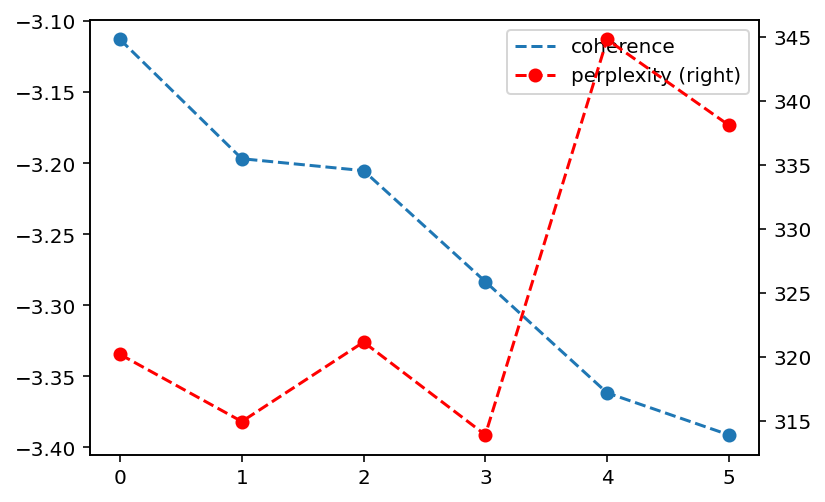

In [207]:
scree_plot(3)

In [37]:
len(all_contents_refined)

1344

In [35]:
topictable

No_document  No_topic  similarity  \
0               0       2.0      0.6786   
1               1       5.0      0.4953   
2               2       4.0      0.5161   
3               3       1.0      0.6388   
4               4       5.0      0.4295   
...           ...       ...         ...   
1339         1339       5.0      0.5138   
1340         1340       3.0      0.9799   
1341         1341       0.0      0.9907   
1342         1342       5.0      0.6214   
1343         1343       1.0      0.8178   

                                                 detail  
0                     [(2, 0.6785574), (4, 0.32091153)]  
1     [(1, 0.28491515), (2, 0.21809393), (5, 0.49534...  
2                    [(2, 0.48274902), (4, 0.51614296)]  
3     [(0, 0.08721635), (1, 0.63881594), (3, 0.11010...  
4     [(2, 0.3391048), (3, 0.038889285), (4, 0.19207...  
...                                                 ...  
1339                 [(3, 0.48510516), (5, 0.51376396)]  
1340                 [(2, 0.01817054), (3, 0.97993577)]  
1341                                   [(0, 0.9906628)]  
1342                 [(3, 0.37766835), (5, 0.62137675)]  
1343                 [(1, 0.81781745), (5, 0.18100469)]  

[1344 rows x 4 columns]

In [82]:
mw9 = nn[0]
topictable = make_topictable_per_doc(mw9, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['No_document', 'No_topic', 'similarity', 'detail']
high_simil = topictable.sort_values(by='similarity',ascending=False)
top2_high = [float(x) for x in range(0,9)]
top2_high*=5
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

# print(save_top2)
sorted_save_top2= sorted(save_top2)

for i in sorted_save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

0.0
0.9991000294685364
카카오 자율주행차 호출 서비스세종 이어 판교서 시범 사업전동 킥보드 씽씽과도 제휴티맵 화물차 전용 내비 등 도입지쿠터 등 킥보드 이용도 가능내년엔 주차 렌터카 서비스도쏘카 맞춤형 이동서비스 확대공유 전기자전거 플랫폼 인수카셰어링 공유차 부름 사업도카카오모빌리티 티맵모빌리티 쏘카의 앱 사용 모습 각 사 제공카카오모빌리티 티맵모빌리티 쏘카 등 모빌리티 플랫폼 간 슈퍼 앱 경쟁이 본격화하는 분위기다 각 사가 인수 제휴 등을 치열하게 벌이며 자사 앱에 신규 모빌리티 서비스를 앞다퉈 추가하고 있다 택시호출이나 내비게이션 차량 공유 등 특정 서비스 하나가 아니라 이동 관련 과정 전반을 아우른다는 목표다 카카오 자율주행 콜택시 운영카카오모빌리티는 이달 들어 주차 렌터카 자율주행차 호출 전동킥보드 연동 서비스 등을 잇따라 내놓고 있다 지난 일엔 자사 를 통해 전동킥보드 브랜드 씽씽 과 제휴 서비스를 시작한다고 밝혔다 카카오 앱 안에서 씽씽 킥보드를 이용하는 구조다 일엔 경기 판교 일대에서 카카오 자율주행 전용 차량 시범 운행을 시작했다 세종시 시범사업에 이어 두 번째다 카카오 앱에서 택시를 이용하는 것처럼 자율주행 차량을 호출해 타면 된다 카카오모빌리티는 같은날 단기 이용 렌터카 중개 서비스도 시작했다 주차 서비스 강화에도 나섰다 일엔 그룹 산하였던 주차장 운영기업 파크 를 억원에 인수했다고 밝혔다 파크 는 자체 브랜드 주차장을 비롯해 주차장 여 곳을 운영하며 시간 무인주차 시스템을 보유하고 있다 카카오모빌리티는 년부터 운영 중인 주차장 안내 요금정산 사업에다 파크 의 인프라와 기술을 더해 인공지능 기반 주차 서비스를 선보일 계획이다 내년 초엔 리테일과 협업해 반려동물 택시 서비스를 내놓을 예정이다 카카오모빌리티는 최근 유상증자 방식을 통해 리테일로부터 억원을 투자받았다 티맵엔 종합 공유킥보드 서비스티맵모빌리티는 지난 일 맵 앱 전면 개편과 함께 공유 킥보드 화물차 전용 내비게이션 등 신규 모빌리티 서비스를 도입했다 맵 하나로 지쿠터

In [101]:
mw9 = bb[0]
topictable = make_topictable_per_doc(mw9, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['No_document', 'No_topic', 'similarity', 'detail']
high_simil = topictable.sort_values(by='similarity',ascending=True)
top2_high = [float(x) for x in range(0,9)]
top2_high*=5
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

# print(save_top2)
sorted_save_top2= sorted(save_top2)

for i in sorted_save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

0.0
0.3052999973297119
시속 미만 차도 주행만 자전거도로 인도는 불법 딜레마 년 명 사망 명 다쳐자전거도로 허용 놓고 논란도전문가 안전장구 착용 등 강화를 정부 관련법 내년까지 만들 것 퍼스널 모빌리티 갈팡질팡 지난 일 새벽 부산 해운대에서 비가 내리는 가운데 전동킥보드를 타던 대 남성이 승용차에 치여 숨졌다 이 남성은 운전면허도 없이 신호를 위반해 편도 차로 횡단보도를 건너다 사고를 당한 것으로 밝혀졌다 이틀 후 새벽에는 서면 근처에서 대 여성이 인도에서 전동킥보드를 타다가 화단에 부딛쳐 차로 도로에 쓰러졌다 다행히 큰 부상은 입지 않았으나 면허취소 수준의 만취 상태인 것이 드러나 경찰에 체포됐다 스마트시티의 라스트마일을 담당할 개인용 운송수단이 인도와 차도 사이에서 우왕좌왕하고 있다 자동차와 함께 도로를 달리자니 퍼스널 모빌리티 이용자가 위험하고 자전거 도로나 인도 운행을 허용하자니 보행자들이 피해를 본다 퍼스널 모빌리티 활성화를 추진하고 있는 정부는 내년까지 관련법을 제정하겠다고 뒤늦게 나섰다 퍼스널 모빌리티는 정부가 추진하는 스마트시티 사업의 교통 대책 가운데 하나다 스마트시티는 사물인터넷과 정보통신기술을 통해 수집한 다양한 데이터를 활용해 교통 전력 급수 폐기물 관리 교육 의료 등을 효율적으로 관리하는 것이다 정부가 추진하는 혁신성장 대 핵심 선도사업 중 하나로 년까지 년 동안 총 억 원의 연구비를 들여 실제 도시에 적용하는 것이 목표다 스마트시티 플랜서 라스트마일 담당 스마트시티의 교통은 대중교통수단에 퍼스널 모빌리티를 조합한 형태로 이뤄진다 국토교통부는 최근 철도 지하철 환승거점을 대상으로 공유 모빌리티 서비스 활성화에 나서겠다고 발표했다 전동킥보드 전기자전거 등을 활용해 대중교통에서 최종 목적지까지 이어지는 라스트마일의 이동 편의성을 높이기 위해서다 출근이나 등교시 지하철 등으로 이동한 뒤 직장이나 학교까지 라스트마일은 역에 비치된 퍼스널 모빌리티를 이용한다는 개념이다 짧은 거리를 이동하는 용도로는 넓은 주차 공간이 필요한 자율

In [102]:
mw9 = bb[0]
topictable = make_topictable_per_doc(mw9, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['No_document', 'No_topic', 'similarity', 'detail']
high_simil = topictable.sort_values(by='similarity',ascending=True)
top2_high = [float(x) for x in range(0,9)]
top2_high*=5
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

# print(save_top2)
sorted_save_top2= sorted(save_top2)

for i in sorted_save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

0.0
0.3052999973297119
시속 미만 차도 주행만 자전거도로 인도는 불법 딜레마 년 명 사망 명 다쳐자전거도로 허용 놓고 논란도전문가 안전장구 착용 등 강화를 정부 관련법 내년까지 만들 것 퍼스널 모빌리티 갈팡질팡 지난 일 새벽 부산 해운대에서 비가 내리는 가운데 전동킥보드를 타던 대 남성이 승용차에 치여 숨졌다 이 남성은 운전면허도 없이 신호를 위반해 편도 차로 횡단보도를 건너다 사고를 당한 것으로 밝혀졌다 이틀 후 새벽에는 서면 근처에서 대 여성이 인도에서 전동킥보드를 타다가 화단에 부딛쳐 차로 도로에 쓰러졌다 다행히 큰 부상은 입지 않았으나 면허취소 수준의 만취 상태인 것이 드러나 경찰에 체포됐다 스마트시티의 라스트마일을 담당할 개인용 운송수단이 인도와 차도 사이에서 우왕좌왕하고 있다 자동차와 함께 도로를 달리자니 퍼스널 모빌리티 이용자가 위험하고 자전거 도로나 인도 운행을 허용하자니 보행자들이 피해를 본다 퍼스널 모빌리티 활성화를 추진하고 있는 정부는 내년까지 관련법을 제정하겠다고 뒤늦게 나섰다 퍼스널 모빌리티는 정부가 추진하는 스마트시티 사업의 교통 대책 가운데 하나다 스마트시티는 사물인터넷과 정보통신기술을 통해 수집한 다양한 데이터를 활용해 교통 전력 급수 폐기물 관리 교육 의료 등을 효율적으로 관리하는 것이다 정부가 추진하는 혁신성장 대 핵심 선도사업 중 하나로 년까지 년 동안 총 억 원의 연구비를 들여 실제 도시에 적용하는 것이 목표다 스마트시티 플랜서 라스트마일 담당 스마트시티의 교통은 대중교통수단에 퍼스널 모빌리티를 조합한 형태로 이뤄진다 국토교통부는 최근 철도 지하철 환승거점을 대상으로 공유 모빌리티 서비스 활성화에 나서겠다고 발표했다 전동킥보드 전기자전거 등을 활용해 대중교통에서 최종 목적지까지 이어지는 라스트마일의 이동 편의성을 높이기 위해서다 출근이나 등교시 지하철 등으로 이동한 뒤 직장이나 학교까지 라스트마일은 역에 비치된 퍼스널 모빌리티를 이용한다는 개념이다 짧은 거리를 이동하는 용도로는 넓은 주차 공간이 필요한 자율

In [134]:
mw9 = bb[5]
topictable = make_topictable_per_doc(mw9, corpus)
topictable = topictable.reset_index() 
topictable.columns = ['No_document', 'No_topic', 'similarity', 'detail']
high_simil = topictable.sort_values(by='similarity',ascending=False)
top2_high = [float(x) for x in range(0,9)]
top2_high*=5
save_top2=[]
for idx,rk in high_simil.iterrows():
    if rk['No_topic'] in top2_high:
        top2_high.remove(rk['No_topic'])
        save_top2.append([rk['No_topic'],rk['No_document'],rk['similarity']])
    if len(top2_high)==0:
        break
        

# print(save_top2)
sorted_save_top2= sorted(save_top2)

for i in sorted_save_top2:
    print(i[0])
    print(i[2])
    print(all_contents_refined[i[1]],end='\n\n')

0.0
0.9983999729156494
부방그룹 세 이대희 前부회장공유 킥보드社 피유엠피 합류키즈 플랫폼 놀이의 발견 分社윤새봄 웅진 전무 대표이사로장동하 교원 기획조정실장스타트업 육성 프로그램 운영공유 킥보드 키즈 플랫폼 에듀테크 최근 중견기업 세들이 직접 경영에 참여하거나 액셀러레이팅을 진행한 스타트업 분야다 신규 사업 분야에 대한 관심과 이해가 높은 세들이 스타트업을 설립하거나 경영에 나서는 사례가 늘고 있다 일 스타트업업계에 따르면 이대희 전 부방그룹 부회장은 지난달부터 공유킥보드 서비스 씽씽 을 운영하는 스타트업 피유엠피의 경영진으로 활동하고 있다 직함은 피유엠피 부대표 겸 최고구매책임자다 회사 경영활동 전반에 참여하고 공급망 관리를 총괄한다 년 월 설립한 피유엠피는 가입자 만 명을 바라보는 공유 킥보드 시장 선두주자다 전동 킥보드를 직접 개발 생산하고 관련 공유 서비스인 씽씽을 운영한다 이 부대표는 올해 초 피유엠피에 직접 투자도 진행했다 피유엠피 관계자는 최근 년간 급격히 성장한 마이크로 모빌리티 시장에 이 부대표가 높은 관심을 보였고 이것이 경영 참여로 이어졌다 고 전했다 이 부대표는 이동건 부방그룹 회장의 장남으로 부방 지분 약 를 보유하고 있다 년부터 년까지 부방 자회사인 쿠첸 사장을 맡았고 년에는 부방 부회장을 지냈다 이 부대표는 여전히 부방의 주주이지만 현재 부방 내 특별한 직함은 없는 것으로 알려졌다 피유엠피는 이 부대표의 합류가 씽씽 등의 서비스 확장에 큰 도움을 줄 것으로 기대하고 있다 이 관계자는 쿠첸 부방에서 오랫동안 경영진 생활을 한 이 부대표의 경영 전략이 피유엠피에 일부 접목될 것 이라고 했다 피유엠피에는 년 월부터 년 월까지 코웨이 대표를 지낸 김동현 부대표도 속해 있다 코웨이는 쿠첸과 같은 생활가전업계 중견기업이다 업계 관계자는 같은 업계에서 활동한 김 부대표가 이 부대표의 합류에 많은 영향을 줬다 고 했다 아버지 회사 의 사내 벤처로 출발해 독립적 성장을 진행 중인 스타트업도 있다 윤새봄 웅진 전무가 운영하는 키즈 전

In [108]:
len([x for x in all_contents_refined if '아이나비' in x])

23

In [132]:
corpus

[[(0, 4),
  (1, 1),
  (2, 3),
  (3, 1),
  (4, 2),
  (5, 3),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 4),
  (28, 2),
  (29, 2),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 3),
  (49, 5),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 3),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 3),
  (74, 2),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 4),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 10),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 2

In [114]:
words = sum([x.split(' ') for x in all_contents_refined], [])

In [116]:
len(words)

340177

In [119]:
from collections import Counter
result = Counter(words)

In [121]:
type(result)

collections.Counter

In [123]:
{k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}

{'전동': 4219,
 '킥보드': 3050,
 '수': 2946,
 '있다': 2540,
 '등': 2214,
 '전동킥보드': 1848,
 '일': 1832,
 '킥보드를': 1720,
 '공유': 1445,
 '개인형': 1382,
 '있는': 1334,
 '만': 1271,
 '및': 1228,
 '한': 1178,
 '년': 1166,
 '고': 1163,
 '월': 1064,
 '지난': 1011,
 '이': 987,
 '것으로': 941,
 '뉴스': 864,
 '관련': 852,
 '사고': 820,
 '시': 803,
 '': 797,
 '자전거': 772,
 '대한': 736,
 '금지': 716,
 '전동킥보드를': 689,
 '서울': 667,
 '며': 660,
 '세': 659,
 '위해': 634,
 '경우': 625,
 '한다': 623,
 '안전': 612,
 '건': 608,
 '헬멧': 606,
 '따르면': 606,
 '중': 604,
 '도로교통법': 603,
 '재배포': 592,
 '말했다': 582,
 '등을': 560,
 '했다': 555,
 '밝혔다': 553,
 '통해': 547,
 '개': 544,
 '위한': 543,
 '대': 533,
 '이동장치': 527,
 '사고가': 526,
 '따라': 509,
 '있습니다': 500,
 '최근': 492,
 '같은': 479,
 '일부터': 468,
 '면허': 468,
 '또': 466,
 '것': 462,
 '이용': 453,
 '이상': 448,
 '범칙금': 447,
 '씨는': 445,
 'PM': 443,
 '지난해': 443,
 '타고': 442,
 '를': 437,
 '모빌리티': 433,
 '더': 432,
 '안전모': 428,
 '함께': 423,
 '킥보드가': 421,
 '있도록': 417,
 '관계자는': 405,
 '로': 402,
 '헬멧을': 401,
 '하는': 391,
 '킥보드는': 390,
 '없이': 381,
 '서비스':

In [118]:
for key in result:
    print key, result[key]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(key, result[key])? (CreatorTemp/ipykernel_22476/1455551476.py, line 5)

In [110]:
len([x for x in all_contents_refined if '씽씽' in x])

70